In [0]:
import pandas as pd 
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, GRU, GRUCell,CuDNNGRU, Masking
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence 
import numpy as np
from keras.layers import Embedding, LSTM, Dense, Dropout, ConvLSTM2D
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
files.upload()

Saving earnings_call_ip_data (2).json to earnings_call_ip_data (2) (1).json


{'earnings_call_ip_data (2).json': b'{\r\n  "text": {\r\n    "0": "Thank you, Ellen. We have a strong 2018, with total revenues of $136.8 billion, up 23% over 2017, reflecting the benefit of our ongoing investments to deliver exceptional experiences for users and compelling returns for our advertisers, partners and enterprise customers.",\r\n    "1": "Stock-based compensation totaled $2.3 billion. Headcount at the end of the quarter was 98,771, up 4,399 from last quarter. Consistent with prior quarters, the majority of new hires were engineers and product managers. In terms of product areas, the most sizable head count increases were in Cloud for both technical and sales roles.",\r\n    "2": "Operating income was $8.2 billion, up 7% versus last year for an operating margin of 21%. Other income and expense was $1.9 billion, which includes $1.3 billion of unrealized gain related to a non-marketable debt security investment. We provide more detail on these line items within OI&E in our ea

In [0]:
#file_name = "/content/driveearnings_call_google_ip_data.json"

data = pd.read_json("earnings_call_ip_data (2).json",orient="columns")
data_inputs =  data["text"].get_values()

In [0]:
sent = {'positive': 1,'negative': 0,'neutral': 2} 
data.sentiment = [sent[item] for item in data.sentiment] 
data_labels = data.sentiment
x_train, x_test, y_train, y_test = train_test_split(data_inputs,data_labels, test_size=0.20)

In [0]:
tokenizer = Tokenizer(nb_words=2500, lower=True,split=' ')
tokenizer.fit_on_texts(data['text'].values)
# To see the dicstionary
#print(tokenizer.word_index)  

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [0]:
# Padding
X = tokenizer.texts_to_sequences(data['text'].values)
X = sequence.pad_sequences(X)

In [0]:
num_words = 2500
embed_dim = 128
lstm_out = 200
batch_size = 32
epochs = 20

model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  # Remove the CWD from sys.path while we load stuff.


In [0]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 0.20, random_state = 36)

#Here we train the Network.

#model.fit(x_train, y_train, batch_size =batch_size,validation_data=(x_test,y_test), epochs = epochs)

In [0]:
model.fit(X_train, Y_train, batch_size =batch_size,validation_data=(X_valid,Y_valid), epochs = epochs)

Instructions for updating:
Use tf.cast instead.
Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 41s 31ms/step - loss: 0.9396 - acc: 0.5208 - val_loss: 0.7717 - val_acc: 0.6424
Epoch 2/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.7723 - acc: 0.6672 - val_loss: 0.7431 - val_acc: 0.6727
Epoch 3/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.6079 - acc: 0.7718 - val_loss: 0.7793 - val_acc: 0.6697
Epoch 4/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.4355 - acc: 0.8370 - val_loss: 0.9366 - val_acc: 0.6364
Epoch 5/20
1319/1319 [==============================] - 38s 28ms/step - loss: 0.3059 - acc: 0.9030 - val_loss: 1.2119 - val_acc: 0.6182
Epoch 6/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.1898 - acc: 0.9515 - val_loss: 1.2233 - val_acc: 0.6212
Epoch 7/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.1293 - ac

In [0]:

embed_dim = 128
lstm_out = 200
batch_size = 32
epochs = 20

model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(128, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Y = pd.get_dummies(data['sentiment']).values


model.fit(X_train, Y_train, batch_size =batch_size,validation_data=(X_valid,Y_valid), epochs = epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Use tf.cast instead.
Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 40s 31ms/step - loss: 0.8939 - acc: 0.5815 - val_loss: 0.7720 - val_acc: 0.6364
Epoch 2/20
1319/1319 [==============================] - 39s 30ms/step - loss: 0.7186 - acc: 0.7127 - val_loss: 0.7421 - val_acc: 0.6727
Epoch 3/20
1319/1319 [==============================] - 39s 29ms/step - loss: 0.5412 - acc: 0.7998 - val_loss: 0.8085 - val_acc: 0.6273
Epoch 4/20
1319/1319 [==============================] - 39s 29ms/step - loss: 0.3803 - acc: 0.8650 - val_loss: 1.0405 - val_acc: 0.6606
Epoch 5/20
1319/1319 [==============================] - 39s 29ms/step - loss: 0.2599 - acc: 0.9204 - val_loss: 1.1282 - val_acc: 0.6545
Epoch 6/20
1319/1319 [==============================] - 38s 29ms/step - loss: 0.1533 - acc: 0.9507 - val_loss: 1.2833 - val_acc: 0.6485
Epoch 7/20
1319/1319 [==============================] - 39s 29ms/step - loss: 0.1241 - ac

In [0]:
model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(
    optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])
Y = pd.get_dummies(data['sentiment']).values


history = model.fit(X_train, Y_train, batch_size =64,validation_data=(X_valid,Y_valid), epochs = epochs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Train on 1319 samples, validate on 330 samples
Epoch 1/20
1319/1319 [==============================] - 21s 16ms/step - loss: 1.0334 - acc: 0.4769 - val_loss: 0.9566 - val_acc: 0.5000
Epoch 2/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9404 - acc: 0.5049 - val_loss: 0.9302 - val_acc: 0.5000
Epoch 3/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9325 - acc: 0.5027 - val_loss: 0.9256 - val_acc: 0.5000
Epoch 4/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9281 - acc: 0.5049 - val_loss: 0.9201 - val_acc: 0.5000
Epoch 5/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9203 - acc: 0.5042 - val_loss: 0.9092 - val_acc: 0.5000
Epoch 6/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.9108 - acc: 0.5178 - val_loss: 0.8879 - val_acc: 0.4970
Epoch 7/20
1319/1319 [==============================] - 20s 15ms/step - loss: 0.8850 - acc: 0.5148 - val_loss: 0.8423 - val_acc: 0.6424
E

In [0]:

loss,acc = model.evaluate(X_valid, Y_valid, verbose = 2, batch_size = batch_size)
print("Validation Loss: %.2f" % (loss))
print("Validation Accuracy: %.2f" % (acc))

Validation Loss: 0.77
Validation Accuracy: 0.64


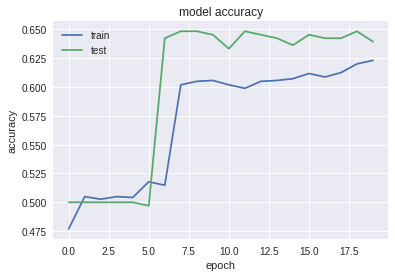

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

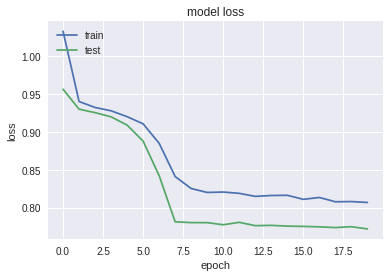

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.add(ConvLSTM2D(
        filters=40,
        kernel_size=(3, 3),
        input_shape=(None, 135, 240, 1),
        padding='same',
        return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(
        filters=40,
        kernel_size=(3, 3),
        padding='same',
        return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(
        filters=40,
        kernel_size=(3, 3),
        padding='same',
        return_sequences=True))
model.add(BatchNormalization())

model.add(Dense(
        units=classes,
        activation='softmax'
))
model.compile(
        loss='categorical_crossentropy',
        optimizer='adadelta'
     metrics=['accuracy']
)


In [0]:
model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(512, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

opt = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
# Compile the model
model.compile(
    optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])
Y = pd.get_dummies(data['sentiment']).values


model.fit(X_train, Y_train, batch_size =batch_size,validation_data=(X_valid,Y_valid), epochs = 25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Train on 1319 samples, validate on 330 samples
Epoch 1/25
1319/1319 [==============================] - 23s 17ms/step - loss: 1.0777 - acc: 0.4981 - val_loss: 1.0480 - val_acc: 0.5000
Epoch 2/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.9783 - acc: 0.5049 - val_loss: 0.8693 - val_acc: 0.5000
Epoch 3/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8728 - acc: 0.5057 - val_loss: 0.8362 - val_acc: 0.5000
Epoch 4/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8445 - acc: 0.5337 - val_loss: 0.8200 - val_acc: 0.5333
Epoch 5/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8296 - acc: 0.6194 - val_loss: 0.8072 - val_acc: 0.6212
Epoch 6/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8096 - acc: 0.6467 - val_loss: 0.7999 - val_acc: 0.6545
Epoch 7/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.7922 - acc: 0.6535 - val_loss: 0.7893 - val_acc: 0.6606
E

In [0]:

loss,acc = model.evaluate(X_valid, Y_valid, verbose = 2, batch_size = batch_size)
print("Validation Loss: %.2f" % (loss))
print("Validation Accuracy: %.2f" % (acc))

Validation Loss: 0.83
Validation Accuracy: 0.70


In [0]:
model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

opt = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
# Compile the model
model.compile(
    optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])
Y = pd.get_dummies(data['sentiment']).values


model.fit(X_train, Y_train, batch_size =batch_size,validation_data=(X_valid,Y_valid), epochs = 25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Train on 1319 samples, validate on 330 samples
Epoch 1/25
1319/1319 [==============================] - 23s 18ms/step - loss: 1.0560 - acc: 0.5019 - val_loss: 0.9668 - val_acc: 0.5000
Epoch 2/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8851 - acc: 0.5049 - val_loss: 0.8272 - val_acc: 0.5000
Epoch 3/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8338 - acc: 0.5633 - val_loss: 0.8000 - val_acc: 0.6212
Epoch 4/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8099 - acc: 0.6323 - val_loss: 0.7875 - val_acc: 0.6545
Epoch 5/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8002 - acc: 0.6429 - val_loss: 0.7725 - val_acc: 0.6394
Epoch 6/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.7808 - acc: 0.6581 - val_loss: 0.7749 - val_acc: 0.6606
Epoch 7/25
1319/1319 [==============================] - 19s 14ms/step - loss: 0.7700 - acc: 0.6626 - val_loss: 0.7578 - val_acc: 0.6576
E

In [0]:

loss,acc = model.evaluate(X_valid, Y_valid, verbose = 2, batch_size = batch_size)
print("Validation Loss: %.2f" % (loss))
print("Validation Accuracy: %.2f" % (acc))

In [0]:
model = Sequential()

# Embedding layer
model.add(Embedding(2500, embed_dim,input_length = X.shape[1], dropout = 0.2))
  

# Masking layer for pre-trained embeddings
#model.add(Masking(mask_value=0.0))

# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='softmax'))

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Compile the model
model.compile(
    optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.


Train on 1319 samples, validate on 330 samples
Epoch 1/15
1319/1319 [==============================] - 24s 18ms/step - loss: 0.9837 - acc: 0.5042 - val_loss: 0.9304 - val_acc: 0.5000
Epoch 2/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.9332 - acc: 0.5110 - val_loss: 0.9171 - val_acc: 0.5000
Epoch 3/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.9096 - acc: 0.5148 - val_loss: 0.8662 - val_acc: 0.5000
Epoch 4/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8464 - acc: 0.5588 - val_loss: 0.7804 - val_acc: 0.6394
Epoch 5/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8230 - acc: 0.6042 - val_loss: 0.7838 - val_acc: 0.6424
Epoch 6/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8266 - acc: 0.6088 - val_loss: 0.7797 - val_acc: 0.6455
Epoch 7/15
1319/1319 [==============================] - 19s 14ms/step - loss: 0.8201 - acc: 0.6058 - val_loss: 0.7750 - val_acc: 0.6515
E

In [0]:

loss,acc = model.evaluate(X_valid, Y_valid, verbose = 2, batch_size = batch_size)
print("Validation Loss: %.2f" % (loss))
print("Validation Accuracy: %.2f" % (acc))

Validation Loss: 0.81
Validation Accuracy: 0.59


In [0]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [0]:
Y = pd.get_dummies(data['sentiment']).values
X =train_data_features

In [0]:
Y = pd.get_dummies(data['sentiment']).values

In [23]:
predictRnn = model.predict(X_valid)
predictRnn

array([[0.12653624, 0.5040641 , 0.3693997 ],
       [0.12862076, 0.5273007 , 0.34407857],
       [0.00578757, 0.03859925, 0.95561326],
       [0.12089962, 0.5143798 , 0.36472055],
       [0.12208344, 0.5141485 , 0.3637681 ],
       [0.13431181, 0.53285116, 0.332837  ],
       [0.01668411, 0.09361798, 0.88969797],
       [0.12332089, 0.5069566 , 0.36972255],
       [0.12245643, 0.5113953 , 0.3661483 ],
       [0.0778065 , 0.35304987, 0.56914365],
       [0.1273227 , 0.5258332 , 0.3468441 ],
       [0.1319768 , 0.5454544 , 0.3225689 ],
       [0.03634328, 0.17821091, 0.78544575],
       [0.12396943, 0.5209714 , 0.35505915],
       [0.11626296, 0.49207267, 0.39166436],
       [0.09076356, 0.3998534 , 0.509383  ],
       [0.12041552, 0.5122675 , 0.36731705],
       [0.08655712, 0.4103055 , 0.5031374 ],
       [0.11814039, 0.49965864, 0.382201  ],
       [0.1280456 , 0.5344671 , 0.33748722],
       [0.12804765, 0.5236025 , 0.34834987],
       [0.00570823, 0.03807186, 0.95621985],
       [0.

In [0]:
type(predictRnn)

numpy.ndarray

In [0]:
for r in predictRnn:
  maxValueIndex =r.argmax()
  #print(maxValueIndex)
  r[0] = 0.0
  r[1] = 0.0
  r[2] = 0.0
  r[maxValueIndex] = 1.0
  
  

In [31]:
Y_valid

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_valid.argmax(axis=1), predictRnn.argmax(axis =1)) 
print('Confusion Matrix :')
print(cm) 

Confusion Matrix :
[[  0  26   5]
 [  0 115  19]
 [  0  69  96]]


[]

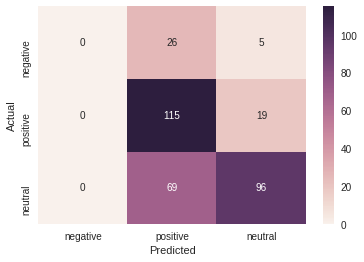

In [35]:
import seaborn as sns
LABELS = ['negative', 'positive','neutral']
a = sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
a.set(xlabel='Predicted', ylabel='Actual')
a.plot()
# xl = plt.xlabel("Predicted")

# yl = plt.ylabel("Actual")